In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import numpy as np
import laminate

╒══════════════════════════════════╤═════════════════════════════════╤══════════════════════════════════╕
│ A Matrix                         │ B Matrix                        │ D Matrix                         │
╞══════════════════════════════════╪═════════════════════════════════╪══════════════════════════════════╡
│ [[2.72e+06 1.02e+06 -2.50e-11]   │ [[-6.23e+07 -6.66e+07 2.19e-09] │ [[1.09e+10 6.53e+09 -1.91e-07]   │
│  [1.02e+06 1.75e+06 -2.50e-11]   │  [-6.66e+07 -6.47e+07 2.19e-09] │  [6.53e+09 8.38e+09 -1.91e-07]   │
│  [-9.52e-12 -9.52e-12 1.61e+06]] │  [8.33e-10 8.33e-10 -7.04e+07]] │  [-7.29e-08 -7.29e-08 8.35e+09]] │
╘══════════════════════════════════╧═════════════════════════════════╧══════════════════════════════════╛
╒════════════╤═══════════╕
│ Property   │     Value │
╞════════════╪═══════════╡
│ Ex         │ 15100     │
├────────────┼───────────┤
│ Ey         │  9700     │
├────────────┼───────────┤
│ Gxy        │  8970     │
├────────────┼───────────┤
│ vxy        │ 

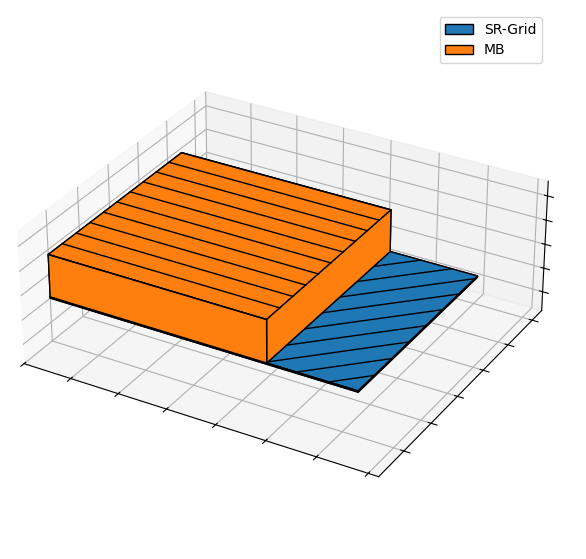

In [2]:
layers = [
    {'name': "SR-Grid", 'E1':  215e3, 'E2': 215e3, 'G12':     0, 'v12': 0.30, 'theta': 45, 'thickness':   5},
    {'name':      "MB", 'E1': 10.8e3, 'E2': 5.4e3, 'G12': 4.5e3, 'v12': 0.26, 'theta':  0, 'thickness': 175}
]

Lam = laminate.Laminate(layers)
Lam.print_results()
Lam.plot()

In [3]:
laminate_analysis = laminate.LaminateLoadAnalysis(Lam)

midplane_strains, midplane_curvatures = laminate_analysis.apply_load(Nx=0, Ny=0, Nxy=100)

ply_strains, ply_stresses = laminate_analysis.compute_ply_stresses_strains(midplane_strains, midplane_curvatures)

laminate_analysis.print_ply_results(ply_strains, ply_stresses)


strains per layer:
╒═════════╤══════════╤══════════╤══════════╕
│   layer │     e_xx │     e_yy │     e_xy │
╞═════════╪══════════╪══════════╪══════════╡
│       1 │ 2.01e-22 │ 4.73e-22 │ 2.57e-05 │
├─────────┼──────────┼──────────┼──────────┤
│       2 │ 4.84e-23 │ 1.14e-22 │ 0.0001   │
╘═════════╧══════════╧══════════╧══════════╛

stresses per layer:
╒═════════╤═══════════╤═══════════╤════════╕
│   layer │      s_xx │      s_yy │   t_xy │
╞═════════╪═══════════╪═══════════╪════════╡
│       1 │ -2.47e-17 │ -2.47e-17 │   4.25 │
├─────────┼───────────┼───────────┼────────┤
│       2 │  7.06e-19 │  7.06e-19 │   0.45 │
╘═════════╧═══════════╧═══════════╧════════╛


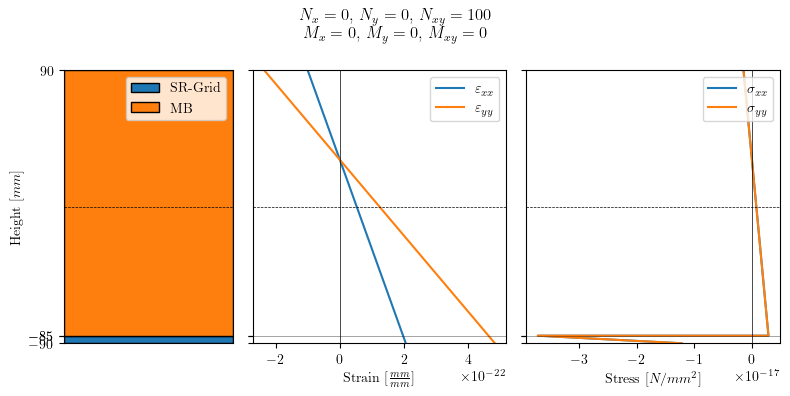

In [4]:
laminate_analysis.plot_stress_strain_variation()